<h1>K-Means Clustering Basics</h1>

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.cluster import KMeans
style.use('ggplot')

<h1>K-Means From Scratch</h1>

In [2]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification            

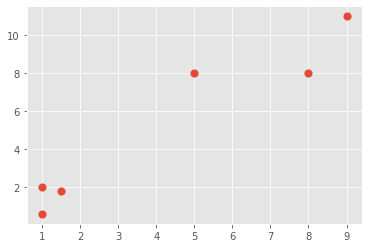

In [3]:
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9, 11]])
plt.scatter(X[:, 0], X[:, 1], s=10, linewidths=5, zorder=10)
plt.show()

In [4]:
clf = KMeans(n_clusters=2)
clf.fit(X)

KMeans(n_clusters=2)

In [5]:
centroids = clf.cluster_centers_
labels = clf.labels_

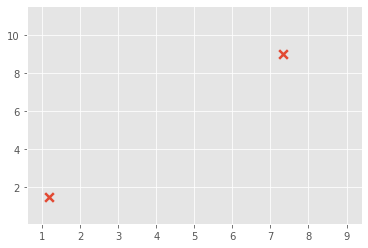

In [6]:
colors =10*["g","r","c","b","k"]
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize=10)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=75, linewidths=2.5, zorder=10)
plt.show()

453.3333333333334
102.72108843537411


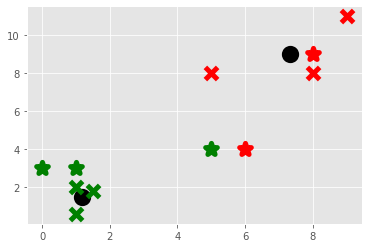

In [7]:
clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        


unknowns = np.array([[1,3],
                     [8,9],
                     [0,3],
                     [5,4],
                     [6,4],])

for unknown in unknowns:
    classification = clf.predict(unknown)
    plt.scatter(unknown[0], unknown[1], marker="*", color=colors[classification], s=150, linewidths=5)


plt.show()

<h1>More K-Means</h1>

In [8]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing, model_selection
from sklearn.model_selection import train_test_split
import pandas as pd

'''
Pclass : Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
survival : Survival (0 = No; 1 = Yes)
name : Name
sex : Sex
age : Age
sibsp : Number of Siblings/Spouses Aboard
parch : Number of Parents/Children Aboard
ticket : Ticket Number
fare : Passenger Fare (British pound)
cabin : Cabin
embarked : Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
boat : Lifeboat
body : Body Identification Number
home.dest : Home/Destination
'''

df = pd.read_excel('titanic.xls')
print(df.head())

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

In [9]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x += 1
                    
            df[column] = list(map(convert_to_int, df[column]))
            
    return df

In [10]:
df.drop(['body','name'], 1, inplace=True)
df.fillna(0, inplace=True)
df = handle_non_numerical_data(df)
print(df.head())

   pclass  survived  sex      age  sibsp  parch  ticket      fare  cabin  \
0       1         1    0  29.0000      0      0     740  211.3375     54   
1       1         1    1   0.9167      1      2     498  151.5500     34   
2       1         0    0   2.0000      1      2     498  151.5500     34   
3       1         0    1  30.0000      1      2     498  151.5500     34   
4       1         0    0  25.0000      1      2     498  151.5500     34   

   embarked  boat  home.dest  
0         2     1         66  
1         2    24        130  
2         2     0        130  
3         2     0        130  
4         2     0        130  


In [11]:
df.drop(['sex', 'boat'], 1, inplace=True)
X = np.array(df.drop(['survived'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

In [12]:
clf = KMeans(n_clusters=2)
clf.fit(X)

KMeans(n_clusters=2)

In [13]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1
        
print(correct/len(X))

0.32161955691367455
